## Compare different upscaling interpolation methods

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
img = cv2.imread("D:\\UniMSc\\MA\\font.png")
img = cv2.resize(img, (20, 20), interpolation=cv2.INTER_NEAREST)  # Resize image

In [25]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # RGB to greyscale

In [26]:
# Otsu's thresholding
_, th = cv2.threshold(grey_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Adaptive thresholding
th2 = cv2.adaptiveThreshold(grey_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 2)

In [27]:
resized = cv2.resize(grey_img, (128, 128), interpolation=cv2.INTER_NEAREST)  # Resize image
resized2 = cv2.resize(th, (128, 128), interpolation=cv2.INTER_NEAREST)
resized3 = cv2.resize(th2, (128, 128), interpolation=cv2.INTER_NEAREST)

In [28]:
res = cv2.resize(grey_img, (128, 128), interpolation=cv2.INTER_LINEAR)  # Resize image
res2 = cv2.resize(th, (128, 128), interpolation=cv2.INTER_LINEAR)
res3 = cv2.resize(th2, (128, 128), interpolation=cv2.INTER_LINEAR)

In [29]:
r = cv2.resize(grey_img, (128, 128), interpolation=cv2.INTER_CUBIC)  # Resize image
r2 = cv2.resize(th, (128, 128), interpolation=cv2.INTER_CUBIC)
r3 = cv2.resize(th2, (128, 128), interpolation=cv2.INTER_CUBIC)

In [20]:
def show_img(image):
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

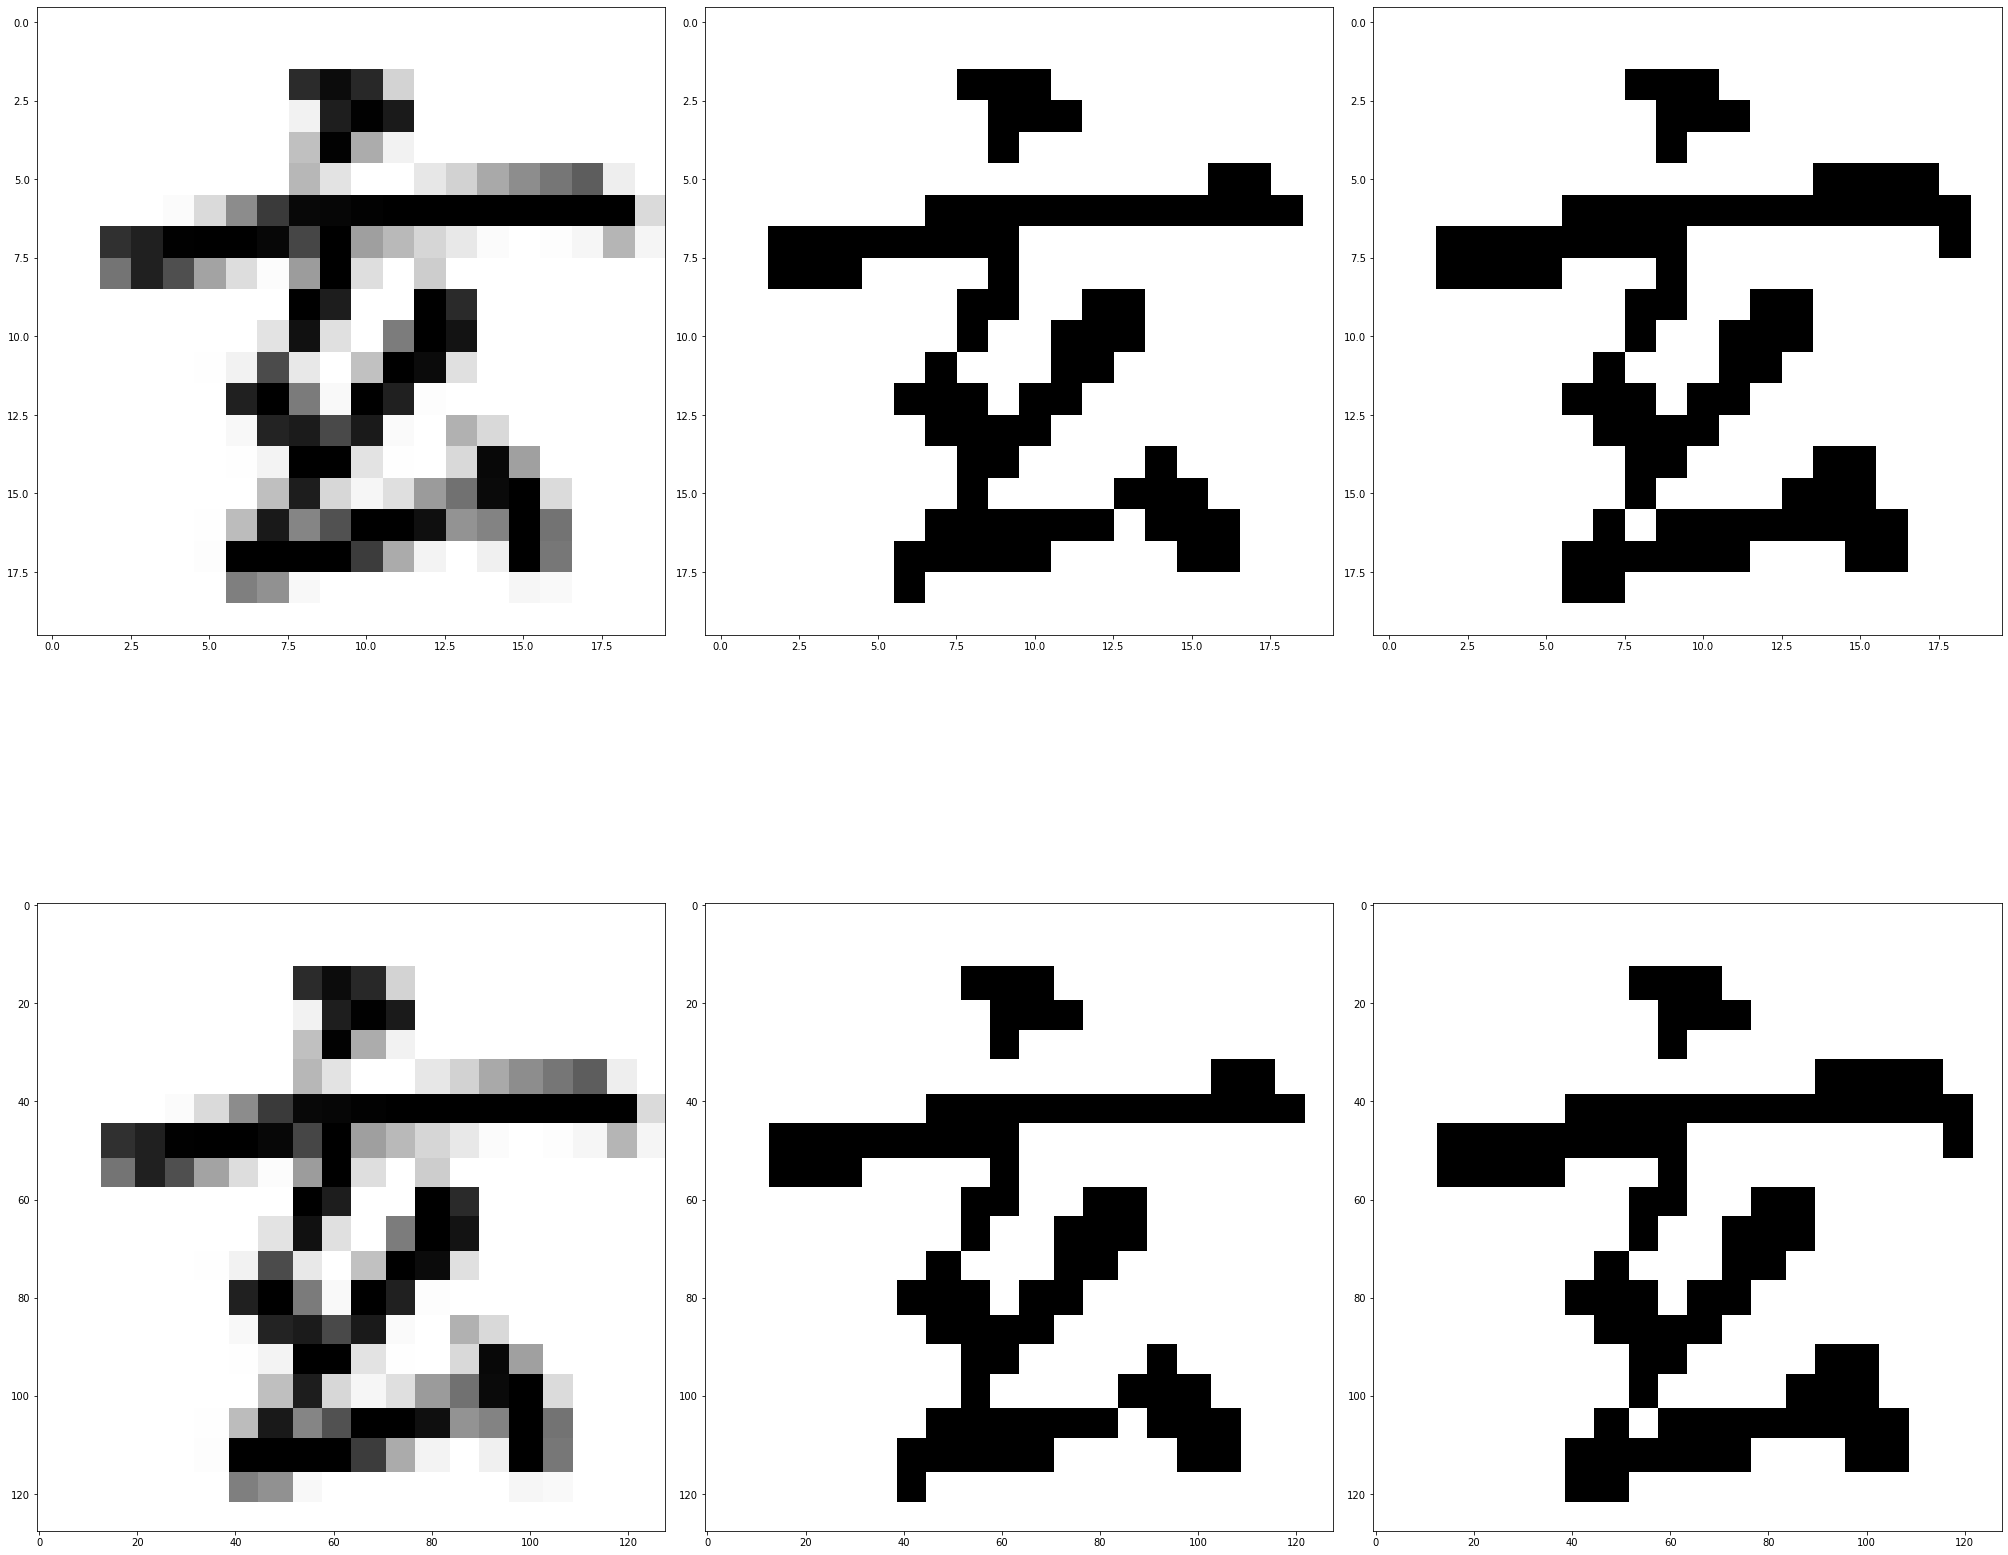

In [31]:
fig = plt.figure(figsize=(28, 28))
rows, columns = 2, 3

fig.add_subplot(rows, columns, 1)
plt.imshow(grey_img, cmap="gray")
fig.add_subplot(rows, columns, 2)
plt.imshow(th, cmap="gray")
fig.add_subplot(rows, columns, 3)
plt.imshow(th2, cmap="gray")
fig.add_subplot(rows, columns, 4)
plt.imshow(resized, cmap="gray")
fig.add_subplot(rows, columns, 5)
plt.imshow(resized2, cmap="gray")
fig.add_subplot(rows, columns, 6)
plt.imshow(resized3, cmap="gray")

plt.tight_layout()
plt.show()

In [51]:
imgs = np.concatenate((grey_img, th, th2), axis=1)
show_img(imgs)

In [56]:
imgs = np.concatenate((resized, resized2, resized3), axis=1)
show_img(imgs)

In [42]:
imgs = np.concatenate((res, res2, res3), axis=1)
show_img(imgs)

In [47]:
imgs = np.concatenate((r, r2, r3), axis=1)
show_img(imgs)

In [49]:
_, t = cv2.threshold(r, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_img(t)

In [54]:
im = cv2.resize(resized2, (20, 20), interpolation=cv2.INTER_NEAREST)  # Resize image
show_img(im)
cv2.imwrite("resized.png", im)

True

## Calculate the average size of the extracted character images

In [57]:
import csv
import os
import numpy as np

In [68]:
tsvname = "D:\\UniMSc\\MA\\detected_sample\\detected\\00001.tsv"
with open(tsvname) as tsvfile:
    bbs = list()
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    for line in tsvreader:
        bb = list(map(int, line[1:5]))  # extract bounding box coordinates
        bbs.append(bb)
print(bbs[0])

arr = np.array(bbs)
arr = np.sum(arr, axis=0) / len(bbs)
print(arr)
print((arr[2]-arr[0]), (arr[3] - arr[1]))

[164, 470, 205, 510]
[325.67924528 486.27358491 360.91509434 522.78301887]
35.2358490566038 36.509433962264154


In [71]:
path = "D:\\UniMSc\\MA\\detected_sample\\detected"
width, height = 0, 0
n = 0  # number of tsv files in folder
for file in os.listdir(path):
    if file.endswith('.tsv'):
        n += 1
        with open(os.path.join(path, file)) as tsvfile:
            bbs = list()
            tsvreader = csv.reader(tsvfile, delimiter="\t")
            for line in tsvreader:
                bb = list(map(int, line[1:5]))  # extract bounding box coordinates
                bbs.append(bb)

            arr = np.array(bbs)
            arr = np.sum(arr, axis=0) / len(bbs)
            width += (arr[2]-arr[0])
            height += (arr[3] - arr[1])
print(width / n, height / n)

24.339267164037146 24.790705341087897


## Extract characters from full size stele and calculate average shape

In [12]:
import os
import cv2
import csv
from pathlib import Path
import numpy as np

In [19]:
def extract_characters(name, img, bbs):
    path = "D:\\UniMSc\\MA\\CycleGAN\\"
    stele_nr = name
    # Create subfolder for each stele image
    try:
        os.mkdir(path + os.path.sep + stele_nr)
    except OSError:
        print("Creation of the directory %s failed" % path)

    folder = path + os.path.sep + stele_nr + os.path.sep

    # Crop and store each character image
    for i in range(len(bbs)):
        x1, y1, x2, y2 = [x if x >= 0 else 0 for x in bbs[i]]  # Get bounding box
        crop_img = img[y1:y2, x1:x2]  # Crop image
#         grey_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)  # RGB to greyscale
        # Otsu's thresholding
        # _, th2 = cv2.threshold(grey_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # Adaptive thresholding
        # th2 = cv2.adaptiveThreshold(grey_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 2)
        # No binarisation
#         resized = cv2.resize(grey_img, (height, width), interpolation=cv2.INTER_NEAREST)  # Resize image
        file_name = str(stele_nr) + "-" + str(i) + ".png"
        cv2.imwrite(folder + file_name, crop_img)
#         char_names.append([file_name] + label)

In [20]:
def load_image(file, img_base, tsv_base):
    img = cv2.imread(os.path.join(img_base, file))
    if img is not None:
        scale = 1024 / img.shape[0]
        name = os.path.splitext(file)[0]
        tsvname = Path(tsv_base + name + ".tsv")
        if not tsvname.is_file():
            return  # skip image since no corresponding file containing the bounding box values could be found
        with open(tsvname) as tsvfile:
            bbs = list()
            tsvreader = csv.reader(tsvfile, delimiter="\t")
            for line in tsvreader:
                bb = list(map(int, line[1:5]))  # extract bounding box coordinates
                bb = [int(np.interp(bb[0], [0, img.shape[1]*scale], [0, img.shape[1]])),
                      int(np.interp(bb[1], [0, img.shape[0]*scale], [0, img.shape[0]])),
                      int(np.interp(bb[2], [0, img.shape[1]*scale], [0, img.shape[1]])),
                      int(np.interp(bb[3], [0, img.shape[0]*scale], [0, img.shape[0]]))]  # rescale bounding box coordinates
                bbs.append(bb)
            extract_characters(name, img, bbs)
            return
    else:
        return  # no image found

In [21]:
load_image("00013-43.JPG", "D:\\UniMSc\\MA\\CycleGAN\\", "D:\\UniMSc\\MA\\CycleGAN\\")

In [22]:
width, height, n = 0, 0, 0
p = "D:\\UniMSc\\MA\\CycleGAN\\00013-43\\"
for file in os.listdir(p):
    if file.endswith('.png'):
        img = cv2.imread(os.path.join(p, file))
        width += img.shape[0]
        height += img.shape[1]
        n += 1
print([width/n, height/n, n])

[45.72254335260116, 43.3150289017341, 346]


## Created randomly patched background

In [65]:
import random

In [56]:
area = np.zeros((5, 5))

In [64]:
img = cv2.resize(area, (128, 128), interpolation=cv2.INTER_NEAREST)  # Resize image
show_img(img)

In [60]:
dic = {}
for i in range(area.shape[0]):
    for j in range(area.shape[1]):
#         dic[i*5 + j] = [i*5 + j, i*5 + j + 1, i*5 + j + 2,
#                        (i + 1)*5 + j, (i + 1)*5 + j + 1, (i + 1)*5 + j + 2,
#                        (i + 2)*5 + j, (i + 2)*5 + j + 1, (i + 2)*5 + j + 2]
        dic[i*5 + j] = [(i + k)*5 + j + l for k in range(3) for l in range(min(3, 5-j))]
print(dic)

{0: [0, 1, 2, 5, 6, 7, 10, 11, 12], 1: [1, 2, 3, 6, 7, 8, 11, 12, 13], 2: [2, 3, 4, 7, 8, 9, 12, 13, 14], 3: [3, 4, 8, 9, 13, 14], 4: [4, 9, 14], 5: [5, 6, 7, 10, 11, 12, 15, 16, 17], 6: [6, 7, 8, 11, 12, 13, 16, 17, 18], 7: [7, 8, 9, 12, 13, 14, 17, 18, 19], 8: [8, 9, 13, 14, 18, 19], 9: [9, 14, 19], 10: [10, 11, 12, 15, 16, 17, 20, 21, 22], 11: [11, 12, 13, 16, 17, 18, 21, 22, 23], 12: [12, 13, 14, 17, 18, 19, 22, 23, 24], 13: [13, 14, 18, 19, 23, 24], 14: [14, 19, 24], 15: [15, 16, 17, 20, 21, 22, 25, 26, 27], 16: [16, 17, 18, 21, 22, 23, 26, 27, 28], 17: [17, 18, 19, 22, 23, 24, 27, 28, 29], 18: [18, 19, 23, 24, 28, 29], 19: [19, 24, 29], 20: [20, 21, 22, 25, 26, 27, 30, 31, 32], 21: [21, 22, 23, 26, 27, 28, 31, 32, 33], 22: [22, 23, 24, 27, 28, 29, 32, 33, 34], 23: [23, 24, 28, 29, 33, 34], 24: [24, 29, 34]}


In [61]:
hotspots = []
while len(dic) > 0:
    ind = random.choice(list(dic.keys()))
    hotspots.append(ind)
    to_remove = dic[ind]
    for key in to_remove:
        if key in dic:
            del dic[key]
print(hotspots)

[8, 21, 5, 3, 2, 20, 0, 24]


In [62]:
for i in hotspots:
    x = int(i/5)
    y = i%5
    area[x, y] = 255

In [63]:
print(area)

[[255.   0. 255. 255.   0.]
 [255.   0.   0. 255.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [255. 255.   0.   0. 255.]]


## Create survey result barplot

In [37]:
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D

In [17]:
sns.set_theme()

In [18]:
sol = [6,7,9,11,12,13,15,16,18,20,23,24,26,28,29,30,33,35,36,39,43,44,45,49,51,53,54]

In [19]:
y = [1,7,3,3,4,5,6,1,6,3,2,6,1,3,3,4,7,5,4,6,4,1,5,7,4,4,5,9,
     5,1,1,2,10,6,1,2,4,5,3,4,2,3,4,6,6,6,5,2,2,2,6,5,6,5]
x = [i+1 for i in range(54)]

In [20]:
y1 = [y[i] for i in range(len(y)) if x[i] in sol]
y2 = [y[i] for i in range(len(y)) if x[i] not in sol]

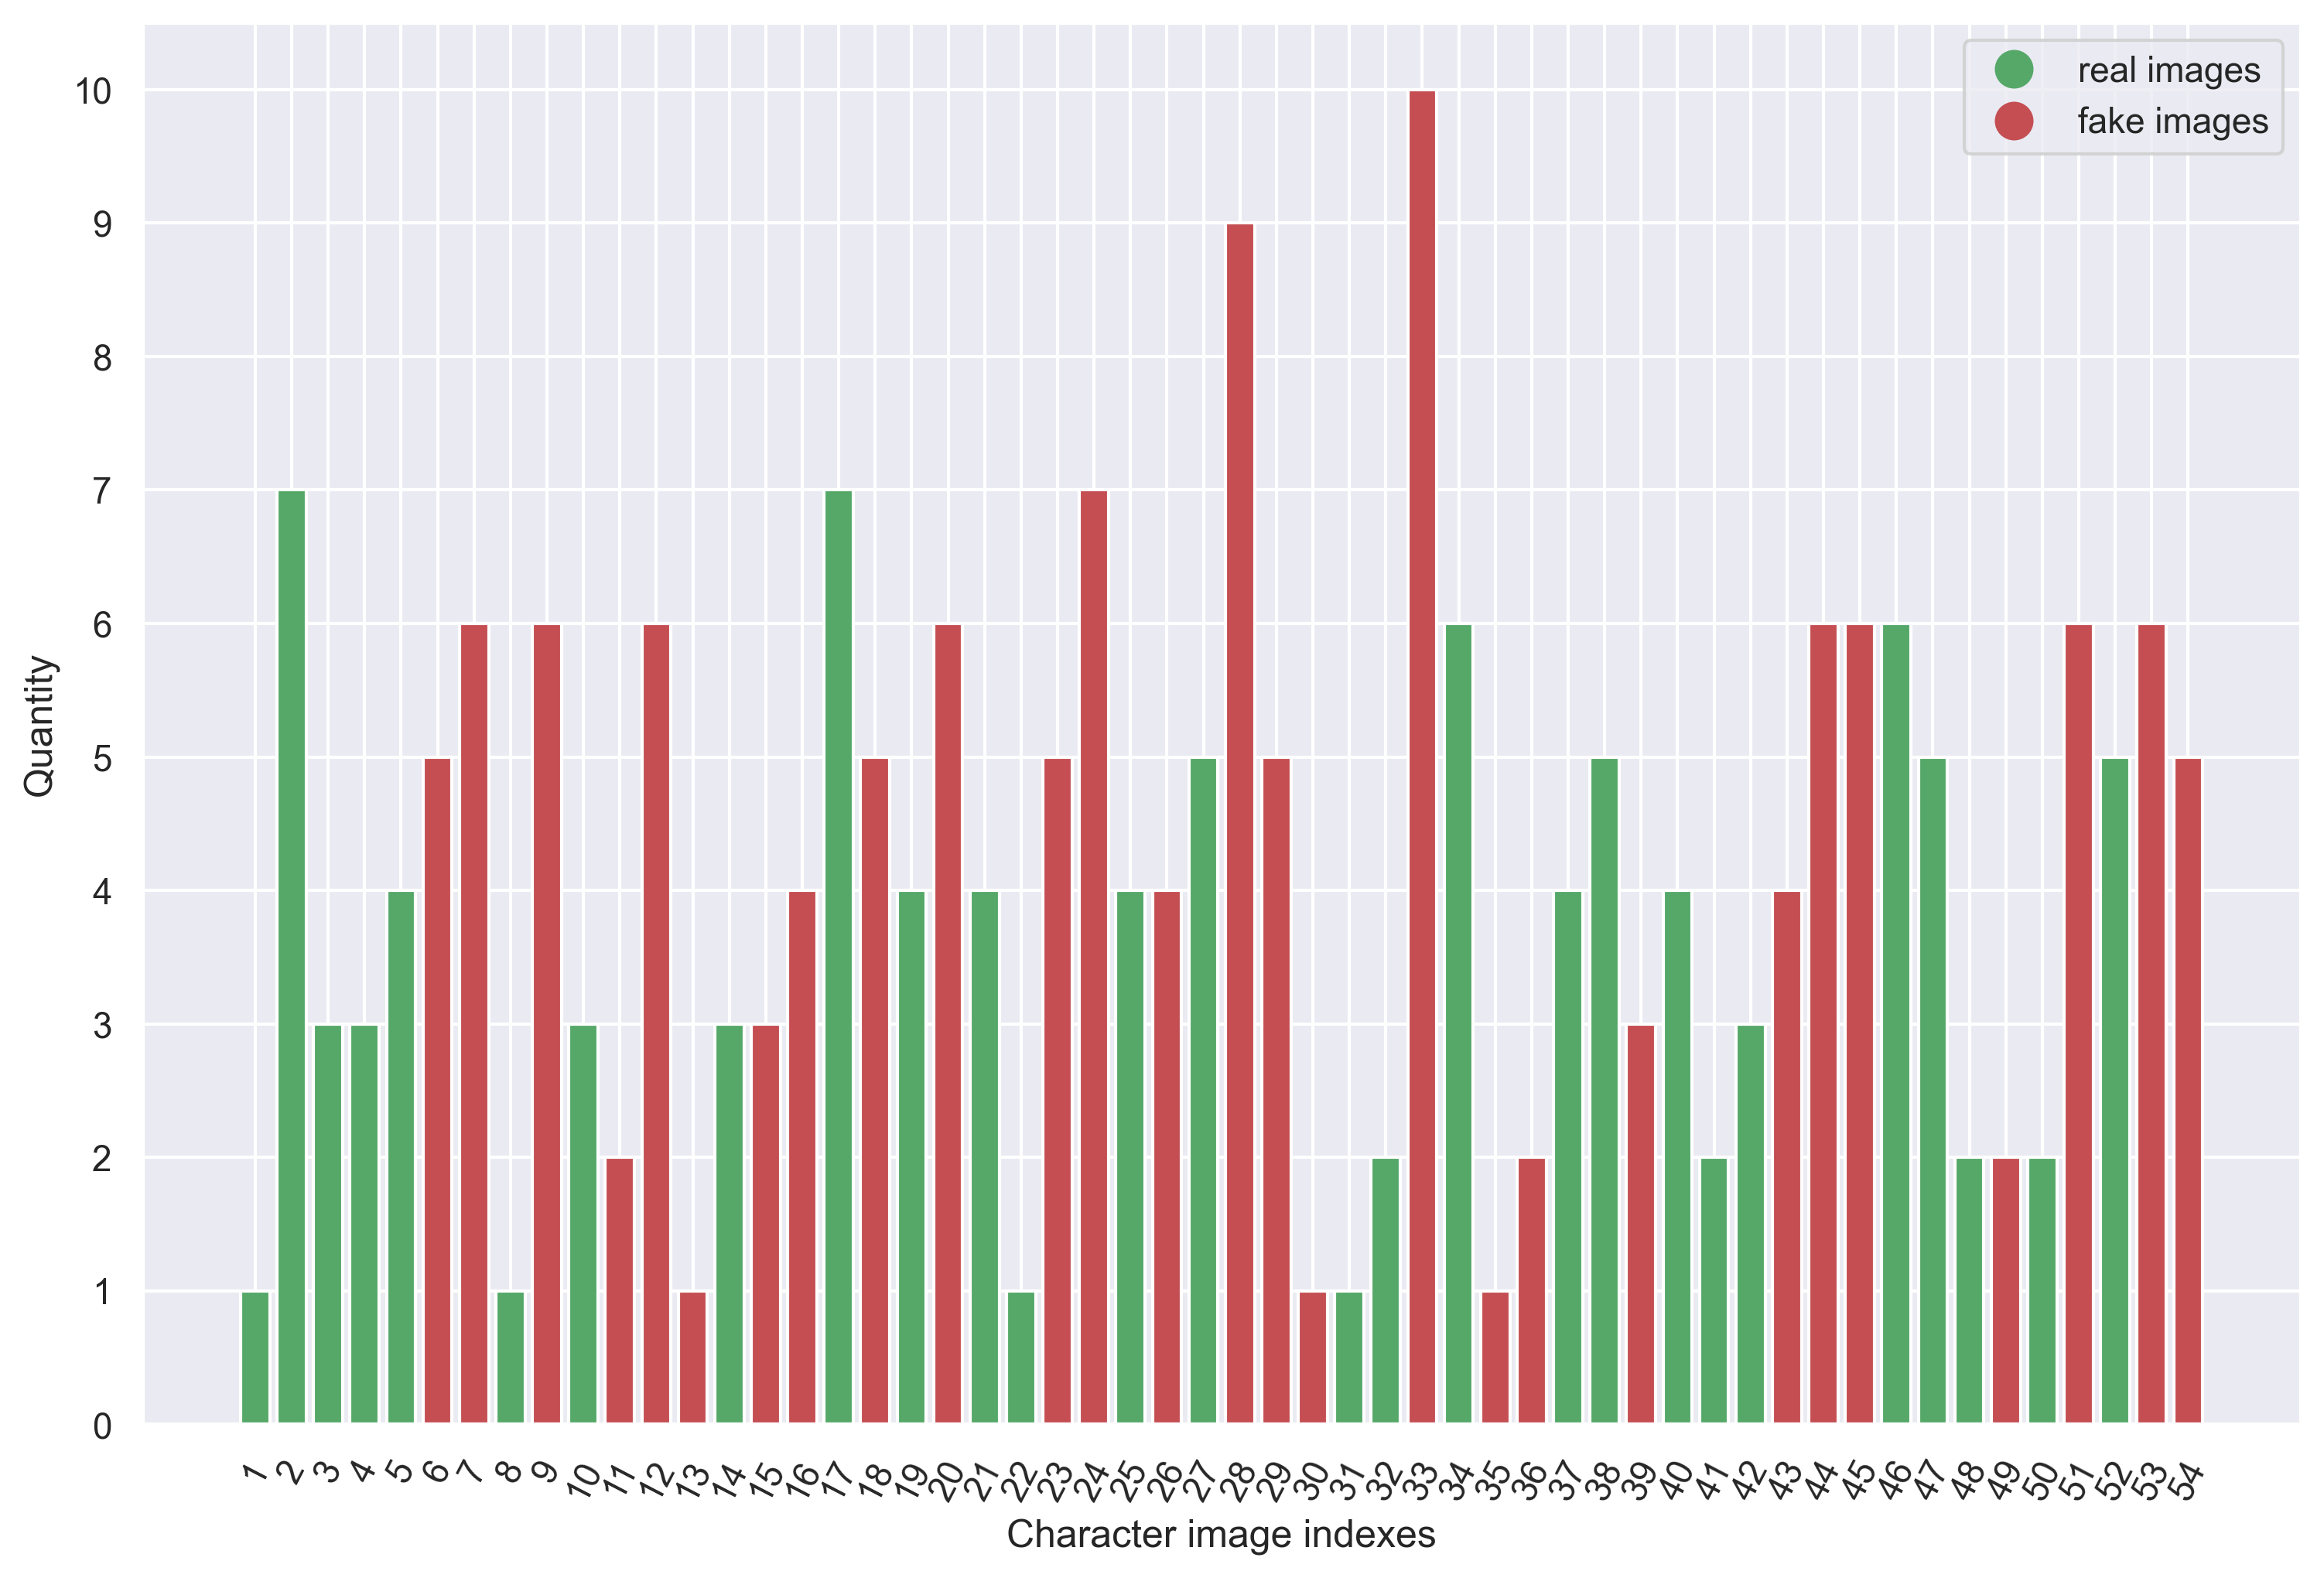

In [43]:
fig=plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
# ax.set_title('Character selection')
ax.set_xlabel('Character image indexes')
ax.set_ylabel('Quantity')
legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
                  for color in ['g', 'r']]
ax.legend(legend_handles, ['real images', 'fake images'])
plt.bar(sol, y1, color='r')
plt.bar([ele for ele in x if ele not in sol], y2, color='g')
plt.xticks(ticks=x, rotation=62.5)
plt.yticks(ticks=[i for i in range(11)])
plt.show()